PostgreSQL connection is closed
PostgreSQL connection is closed



Naive-Bayes



GaussianNB(priors=None, var_smoothing=1e-09)



Score :0.8043297252289758





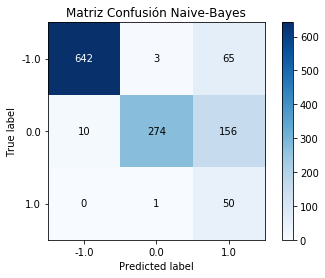

In [2]:
import psycopg2
import sys, nltk, re, string, heapq, gensim
from nltk.corpus import stopwords
from psycopg2 import Error
import math
from matplotlib import pyplot as plt
import pandas as pd
import pandas.io.sql as sqlio

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt


def crearConexion():
    
    connection = psycopg2.connect(user = "m.soto.montesinos",
                                      password = "1234",
                                      host = "127.0.0.1",
                                      port = "5432",
                                      database = "twitterBBVA")

    return connection

def obtenerTweets(tabla):

    try:
        
        connection = crearConexion()
        query = """
                SELECT clasificacion, sentimiento, caso_villarejo, futbol, mayusculas,
                lista_palabras_positivas, lista_palabras_negativas, emoticonos_buenos,
                emoticonos_malos FROM %s;
                """ % (tabla)
        
        tweets = sqlio.read_sql_query(query, connection)
        
    except (Exception, psycopg2.DatabaseError) as error :
    
        print ("Error obteniendo los datos", error)
    
    finally:
        
        if (connection):
            
            connection.close()
            print("PostgreSQL connection is closed")

    return tweets


def main():
    
    training_tweets = obtenerTweets("training_set")
    testing_tweets = obtenerTweets("testing_set")
    
    x_training_tweets = training_tweets.drop(columns = ['clasificacion'])
    y_training_tweets = training_tweets['clasificacion']
    x_testing_tweets = testing_tweets.drop(columns = ['clasificacion'])
    y_testing_tweets = testing_tweets['clasificacion']
    
    modelo = GaussianNB()
    modelo.fit(x_training_tweets, y_training_tweets)
    score = modelo.score(x_testing_tweets, y_testing_tweets)
    
    print('\n\n')
    print("Naive-Bayes")
    print('\n\n')
    print(modelo)
    print('\n\n')
    print("Score :" + str(score))
    print('\n\n')
    naive_bayes_predicciones = modelo.predict(x_testing_tweets)
    
    skplt.metrics.plot_confusion_matrix(y_testing_tweets,
                                        naive_bayes_predicciones,
                                        title = "Matriz Confusión Naive-Bayes",
                                        normalize=False)
    plt.show()

    
if __name__ == '__main__':
    main()




